# Data visualisation

<img style="float: left;" src="./lecture_images/heatmap.png" width="40%">

Data visualisation is mapping quantitative or qualitative information into the position, size, colour, or shape of graphical elements.

Biologists use data visualisation to:

* Understand and interpret large and complex sets of information
* To look for and present patterns and relationships in the data
* Identify outliers or anomalies in the data
* Communicating research finding and results to others, as it can make the data more accessible and understandable to a wider audience.


### Intended Learning Outcomes

By the end of this lecture, you should be able to: 

- Use Pandas to selectively analyze and summarize data
- Apply fundamental principles for creating effective data visualizations
- Identify and select the most suitable graphics for representing various forms and combinations of data.
- Complete this week's data analysis workshop.

### Self Study Notebooks

Self study notebooks on pandas data handling and data visualisation have been released. Please ensure you complete these and the exercise sheet before attending this week's workshop. 


## Excel vs CSV: Why use CSV?

In Workshop 1, we used Excel to enter our data, and we also encountered some of the problems with using Spreadsheet software for entering data.

<img src='./lecture_images/excel1.jpeg'>


## Excel vs CSV: Why use CSV?



<img src='./lecture_images/excel2.jpeg'>

## Excel vs CSV: Why use CSV?

<img src='./lecture_images/excel3.jpeg'>



## Loading data into Pandas and checking format

For this example, we'll use the mammal sleep dataset, which contains data on animal attributes, ecological factors and sleeping patterns in mammals. 

### Dataset Overview

<img style="float: right;" src="./lecture_images/elephant_zzzz.jpg" width="50%">


| Variable         | Description                             |
|------------------|-----------------------------------------|
| `name`           | Common name                            |
| `genus`          | Genus                                  |
| `vore`           | Carnivore, omnivore, or herbivore?     |
| `order`          | Order                                  |
| `conservation`   | The conservation status of the animal  |
| `sleep_total`    | Total amount of sleep, in hours        |
| `sleep_rem`      | REM sleep, in hours                   |
| `sleep_cycle`    | Length of sleep cycle, in hours        |
| `awake`          | Amount of time spent awake, in hours   |
| `brainwt`        | Brain weight in kilograms             |
| `bodywt`         | Body weight in kilograms              |

### Data Sources

- **Original Source**: [Statsci Sleep Dataset](http://www.statsci.org/data/general/sleep.txt)

### References and Acknowledgements

- Allison, T., & Cicchetti, D. (1975). Sleep in mammals: ecological and constitutional correlates. *Archives of Hydrobiology*, 75, p. 442.
- V. M. Savage and G. B. West. A quantitative, theoretical framework for understanding mammalian sleep. Proceedings of the National Academy of Sciences, 104 (3):1051-1056, 2007. 

In [2]:
# importing modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#make figures large

plt.rcParams["figure.figsize"] = (12,8)

In [3]:
#reading in the data
mammals_df=pd.read_csv("msleep.csv")

# To remove lines with missing values ('NaN'), run .dropna()
#mammals_df.dropna(inplace=True)

display(mammals_df)

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
...,...,...,...,...,...,...,...,...,...,...,...
78,Tree shrew,Tupaia,omni,Scandentia,NaN,8.9,2.6,0.233333,15.1,0.00250,0.104
79,Bottle-nosed dolphin,Tursiops,carni,Cetacea,NaN,5.2,NaN,NaN,18.8,NaN,173.330
80,Genet,Genetta,carni,Carnivora,NaN,6.3,1.3,NaN,17.7,0.01750,2.000
81,Arctic fox,Vulpes,carni,Carnivora,NaN,12.5,NaN,NaN,11.5,0.04450,3.380


In [4]:
#checking the data
mammals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          83 non-null     object 
 1   genus         83 non-null     object 
 2   vore          76 non-null     object 
 3   order         83 non-null     object 
 4   conservation  54 non-null     object 
 5   sleep_total   83 non-null     float64
 6   sleep_rem     61 non-null     float64
 7   sleep_cycle   32 non-null     float64
 8   awake         83 non-null     float64
 9   brainwt       56 non-null     float64
 10  bodywt        83 non-null     float64
dtypes: float64(6), object(5)
memory usage: 7.3+ KB


## Column selection

You can select a specific column from a DataFrame using the df['column_name'] notation.

In [5]:
#first lets view the column headers
mammals_df.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000


In [6]:
# Accessing individual columns
mammals_df['genus']

0       Acinonyx
1          Aotus
2     Aplodontia
3        Blarina
4            Bos
         ...    
78        Tupaia
79      Tursiops
80       Genetta
81        Vulpes
82        Vulpes
Name: genus, Length: 83, dtype: object

## .unique( )

In [7]:
#Getting all unique values in a column fo categorical variables
print(mammals_df['order'].unique())

['Carnivora' 'Primates' 'Rodentia' 'Soricomorpha' 'Artiodactyla' 'Pilosa'
 'Cingulata' 'Hyracoidea' 'Didelphimorphia' 'Proboscidea' 'Chiroptera'
 'Perissodactyla' 'Erinaceomorpha' 'Cetacea' 'Lagomorpha' 'Diprotodontia'
 'Monotremata' 'Afrosoricida' 'Scandentia']


## .value_counts()
`value_counts()` is a method in the pandas library for counting the number of occurrences of each unique value in a column of a DataFrame or a Series.

In [8]:
# .value_counts()
mammals_df['order'].value_counts()

order
Rodentia           22
Carnivora          12
Primates           12
Artiodactyla        6
Soricomorpha        5
Perissodactyla      3
Cetacea             3
Hyracoidea          3
Diprotodontia       2
Erinaceomorpha      2
Proboscidea         2
Chiroptera          2
Didelphimorphia     2
Cingulata           2
Lagomorpha          1
Pilosa              1
Monotremata         1
Afrosoricida        1
Scandentia          1
Name: count, dtype: int64

In [9]:
#How many carnivores, herbivores and omnibores were included in the study?

## Selecting and filtering subsets of data

### .query()

.query() allows us to filter a dataframe using some conditions - i.e. only return rows that match some criteria

In [10]:
#Only return carnivorous rodent
mammals_df.query('order=="Rodentia" & vore=="carni"')

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
46,Northern grasshopper mouse,Onychomys,carni,Rodentia,lc,14.5,NaN,NaN,9.5,NaN,0.028


## .groupby()


In [11]:
#What is the mean sleep length of each order of mammals?
mammals_grouped_by_species=mammals_df.groupby('order')['sleep_total'].mean().reset_index()
mammals_grouped_by_species

,order,sleep_total
0,Afrosoricida,15.600000
1,Artiodactyla,4.516667
2,Carnivora,10.116667
3,Cetacea,4.500000
4,Chiroptera,19.800000
5,Cingulata,17.750000
6,Didelphimorphia,18.700000
7,Diprotodontia,12.400000
8,Erinaceomorpha,10.200000
9,Hyracoidea,5.666667


WOOCLAP: TGUORC


In [12]:
from IPython.display import IFrame
IFrame("https://app.wooclap.com/events/TGUORC/questions/65aafcb0b1b47f8b77fd45a4", 900,500)


<img style="float: right;" src="./lecture_images/pie.png" width="33%"> 

Lesson 1: Pie charts are generally poor as humans are not as good at comparing angles as they are at comparing the size of bars.

Lesson 2: Always label axes and give unit



# Effective Data Visualisation

 There are a few key principles to keep in mind when creating visualisations:
1. **Choose the right chart type**: Different chart types are best suited for different types of data AND different numbers of data points.  
2. **Use clear and accurate labels**: Have clear and accurate labels, including axis labels and data points. 
3. **Use appropriate scales**: Using the right scale is important for ensuring that your visualisations are accurate and easy to interpret. For example, using a log scale can help to better represent data with a wide range of values.
4. **Avoid clutter**: Keep your visualisations simple and avoid clutter.



# Choosing types of plot

There are several factors that can influence the choice of plot in data visualization, including:
<img style="float: right;" src="./chart-chooser-2020.pdf" width="50%"> 

* **Type of data**
* **Number of variables**
* **Number of data points**
* **Purpose of the visualization**

Resources: 

https://www.data-to-viz.com/

https://www.python-graph-gallery.com/

[Chart Chooser](chart-chooser-2020.pdf)





# Types of variable
    
* Categorical or Numerical
* Subdivided into:
    * Categorical nominal (e.g. eye colour)
    * Categorical ordinal (e.g. Disease severity: mild, moderate, severe, or Stage of development: egg, larva, pupa, adult)
    * Numerical discrete
    * Numerical continuous

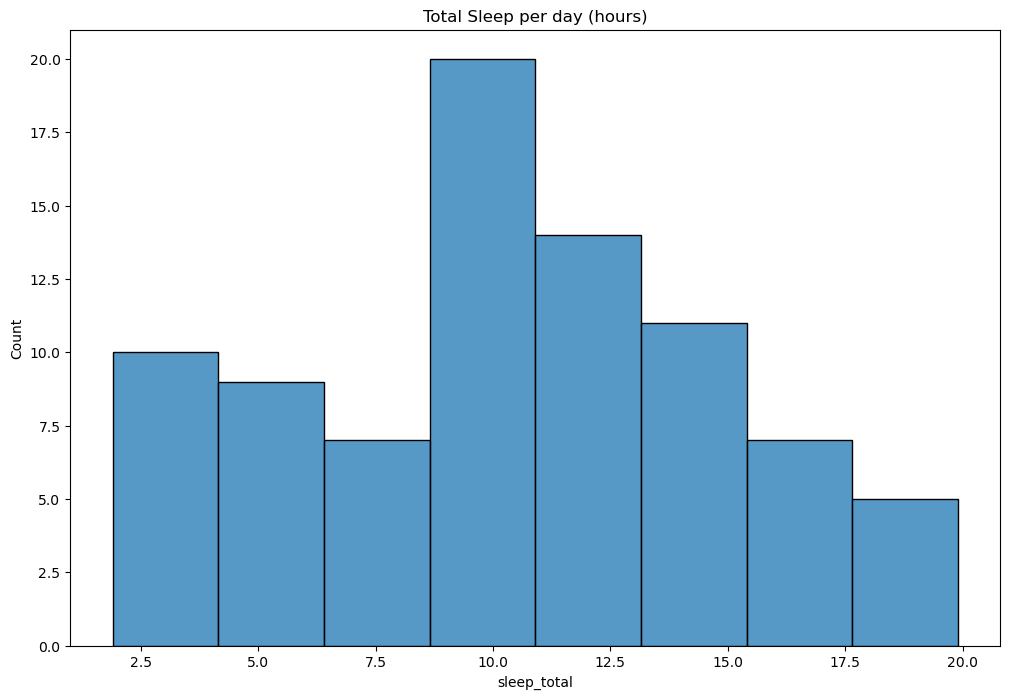

In [13]:
##Single Numerical Variable
# Histogram
sns.histplot(mammals_df['sleep_total'], kde=False)
plt.title('Total Sleep per day (hours)')
plt.show()

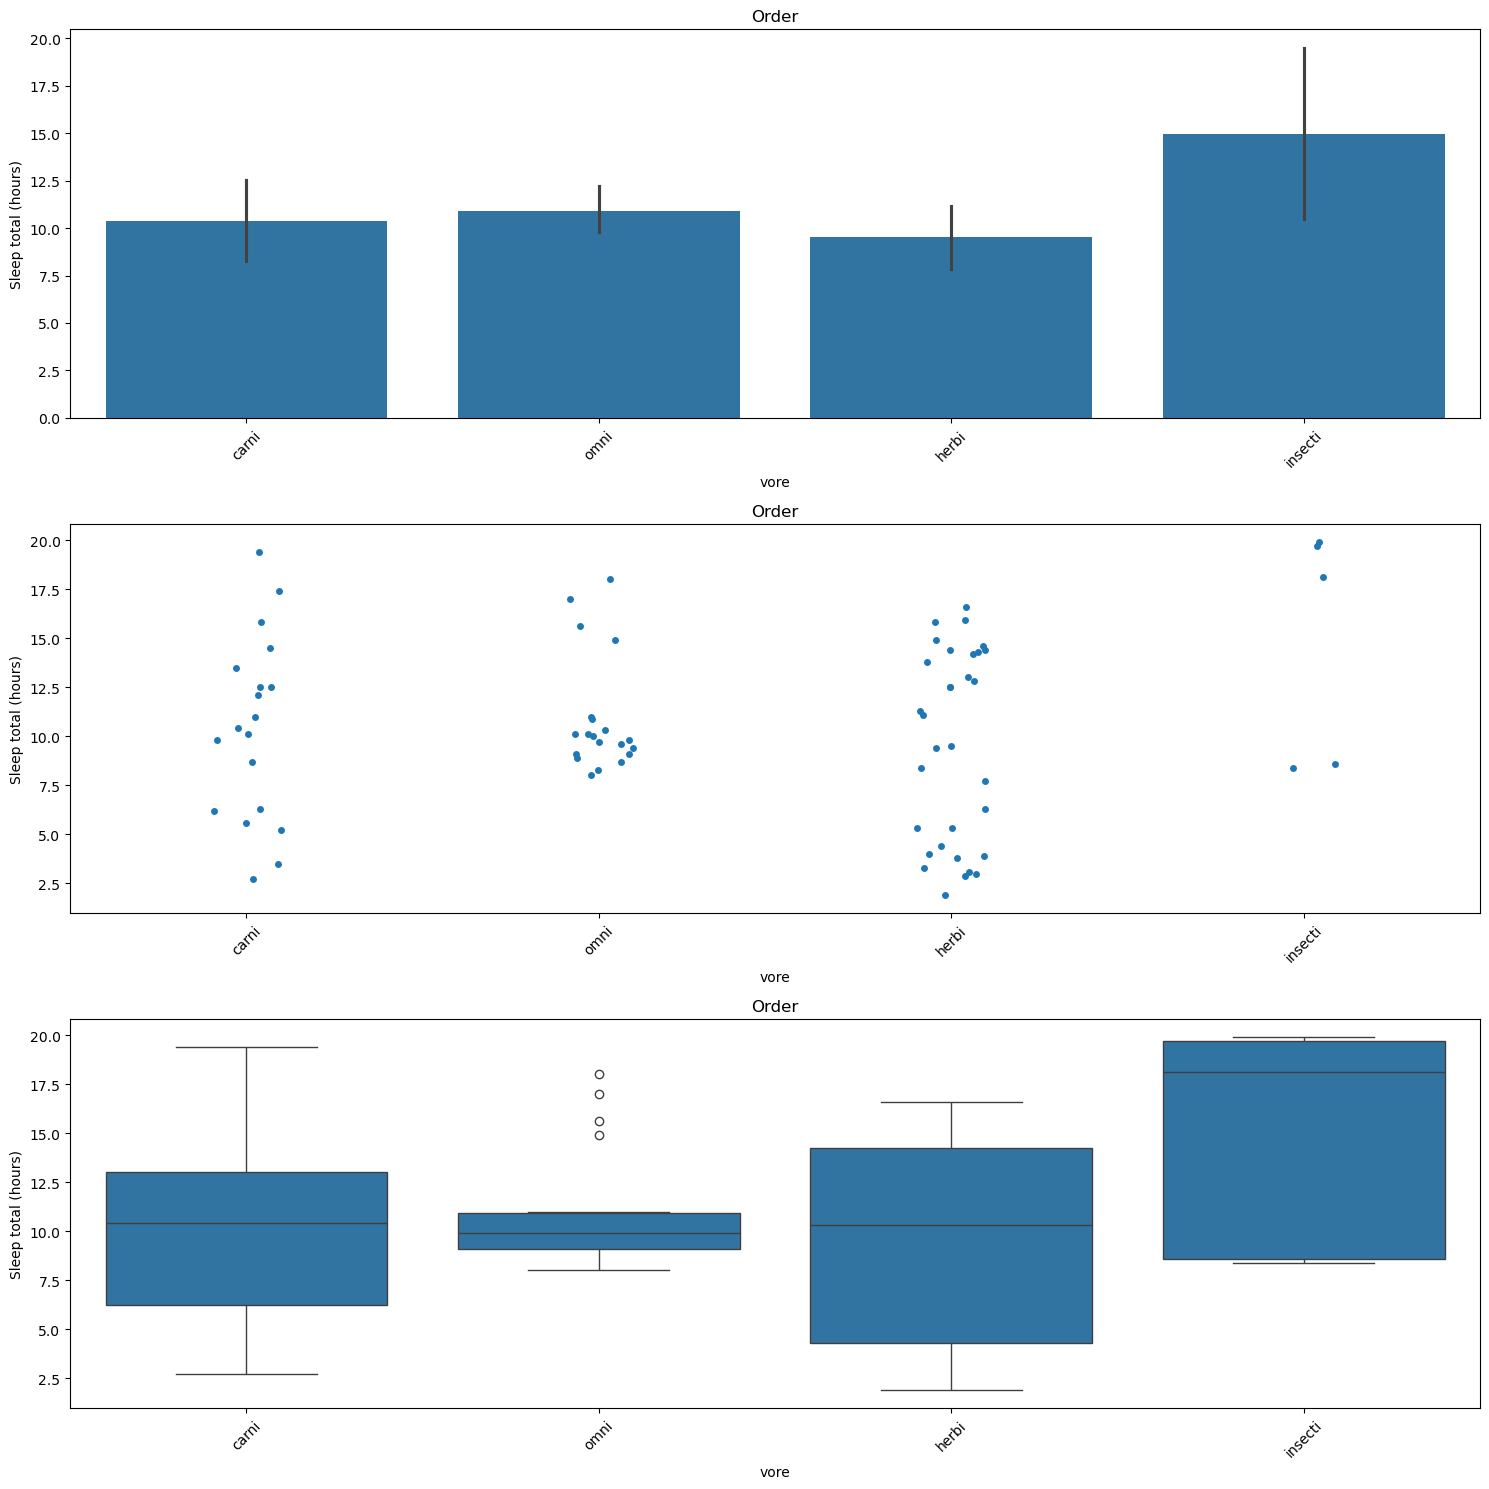

In [14]:
##1 categorical, 1 numerical variable 

# Create a figure with multiple subplots
fig, ax = plt.subplots(3, 1, figsize=(15, 15))  # 1 rows, 3 columns

# Bar Chart
sns.barplot(x='vore', y='sleep_total', data=mammals_df, ax=ax[0])
ax[0].set_title('Order')
ax[0].set_ylabel('Sleep total (hours)')
ax[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Swarmplot
sns.stripplot(x='vore', y='sleep_total', data=mammals_df, ax=ax[1])
ax[1].set_title('Order')
ax[1].set_ylabel('Sleep total (hours)')
ax[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Box Plot
sns.boxplot(x='vore', y='sleep_total', data=mammals_df, ax=ax[2])
ax[2].set_title('Order')
ax[2].set_ylabel('Sleep total (hours)')
ax[2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust the layout to prevent overlap
plt.tight_layout()

plt.show()



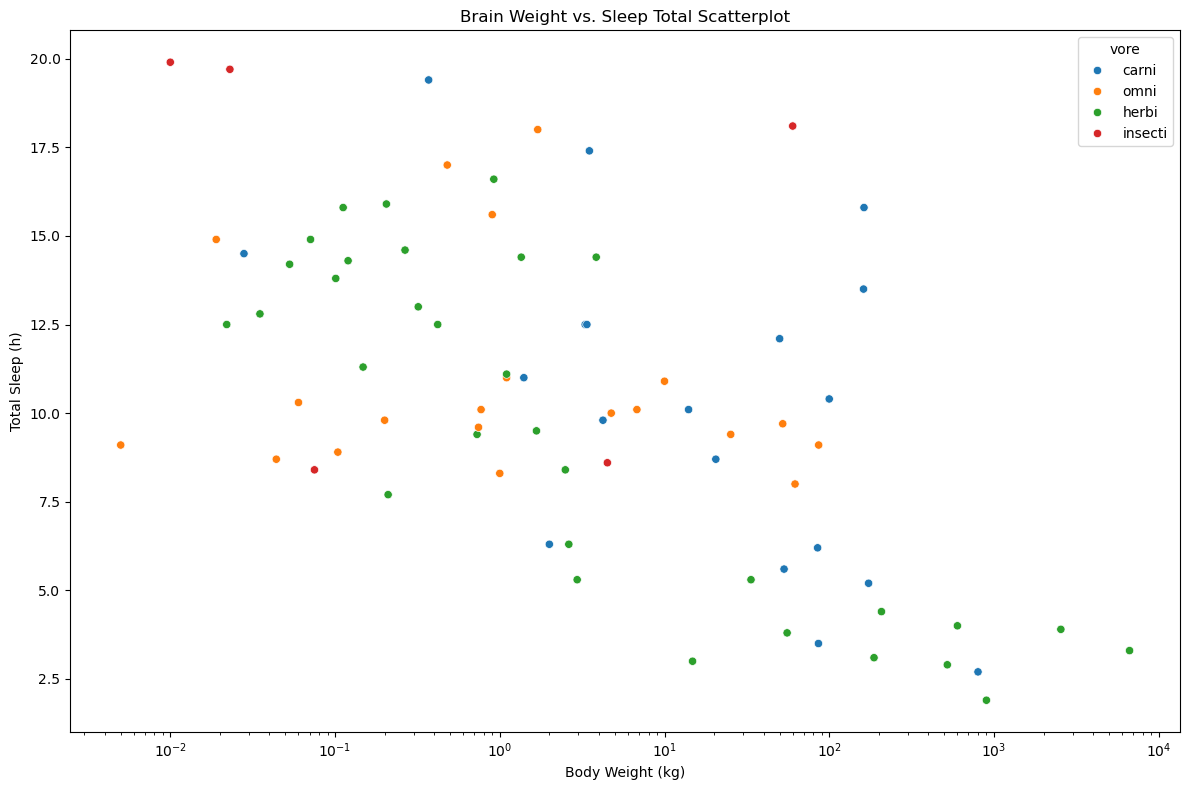

In [15]:
# 2 continuous numerical variables
#Is there a relationship between body weight and total sleep?
# Scatter Plot
sns.scatterplot(x='bodywt', y='sleep_total', hue='vore', data=mammals_df)
plt.title('Brain Weight vs. Sleep Total Scatterplot')

# Set x-axis to log scale (log10)
plt.xscale('log')

plt.xlabel("Body Weight (kg)")
plt.ylabel("Total Sleep (h)")

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()


# Chocolate Consumption, Cognitive Function, and Nobel Laureates
<img style="float: left;" src="./lecture_images/nobel_chocolate.jpg" width="60%">
<img style="float: right;" src="./lecture_images/nejm_cover.png" width="40%">

# Single variable over time

/var/folders/cl/8c_jpb_n4cz6msr6x8j21ss40000gn/T/ipykernel_46341/365452169.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




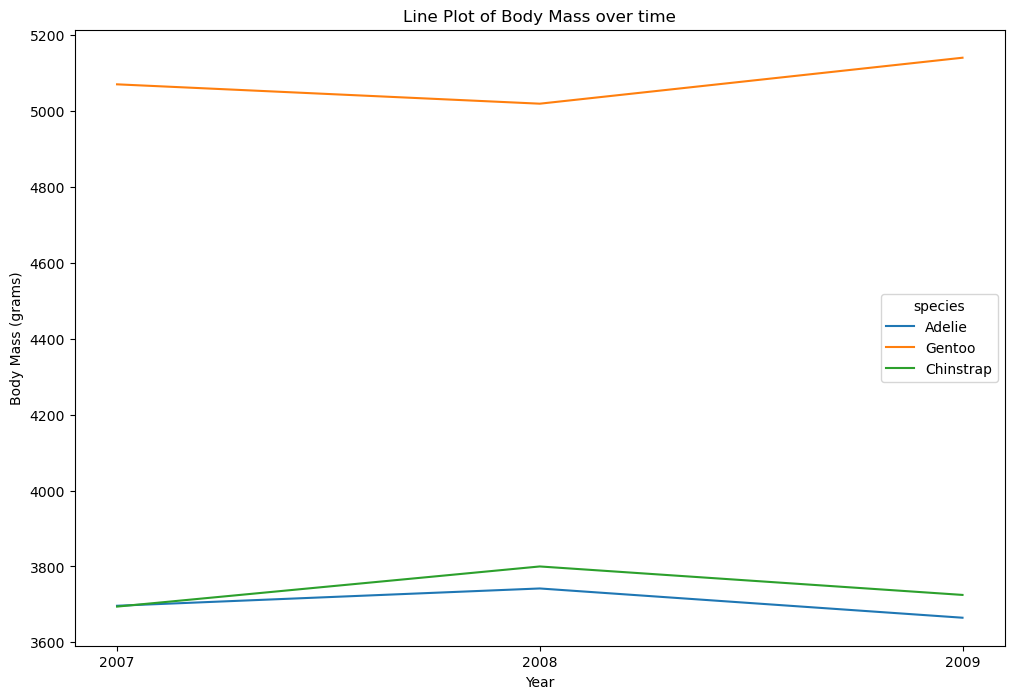

In [16]:
penguin_df=pd.read_csv('palmer_penguins.csv')

sns.lineplot(x='year', y='body_mass_g', data=penguin_df, hue='species', ci=None)
plt.xlabel('Year')
plt.ylabel('Body Mass (grams)')
plt.title('Line Plot of Body Mass over time')
#Set x ticks to only show years
plt.xticks(range(min(penguin_df['year']), max(penguin_df['year'])+1))
plt.show()

# Spatial Data



In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

malaria_df=pd.read_csv('Pfalciparum-data.csv')
malaria_df

,ISO3,Name,Admin Level,Metric,Units,Year,Value
0,AFG,Afghanistan,admin0,Incidence Rate,Cases per Thousand,2010,1.176667
1,AFG,Afghanistan,admin0,Incidence Rate,Cases per Thousand,2011,1.053869
2,AFG,Afghanistan,admin0,Incidence Rate,Cases per Thousand,2012,0.213129
3,AFG,Afghanistan,admin0,Incidence Rate,Cases per Thousand,2013,0.367701
4,AFG,Afghanistan,admin0,Incidence Rate,Cases per Thousand,2014,0.653501
...,...,...,...,...,...,...,...
3493,ZWE,Zimbabwe,admin0,Mortality Rate,Deaths per 100 Thousand,2016,17.548997
3494,ZWE,Zimbabwe,admin0,Mortality Rate,Deaths per 100 Thousand,2017,26.484462
3495,ZWE,Zimbabwe,admin0,Mortality Rate,Deaths per 100 Thousand,2018,14.745261
3496,ZWE,Zimbabwe,admin0,Mortality Rate,Deaths per 100 Thousand,2019,11.955043


In [18]:
#restrict to 2017 data and mortality data only
malaria_df_2017=malaria_df.query("Year==2017 and Metric=='Mortality Rate'")
malaria_df_2017

,ISO3,Name,Admin Level,Metric,Units,Year,Value
29,AFG,Afghanistan,admin0,Mortality Rate,Deaths per 100 Thousand,2017,1.748803
62,DZA,Algeria,admin0,Mortality Rate,Deaths per 100 Thousand,2017,0.000000
95,AGO,Angola,admin0,Mortality Rate,Deaths per 100 Thousand,2017,31.942156
128,ARG,Argentina,admin0,Mortality Rate,Deaths per 100 Thousand,2017,0.000000
161,ARM,Armenia,admin0,Mortality Rate,Deaths per 100 Thousand,2017,0.000000
...,...,...,...,...,...,...,...
3362,VEN,Venezuela,admin0,Mortality Rate,Deaths per 100 Thousand,2017,1.706701
3395,VNM,Vietnam,admin0,Mortality Rate,Deaths per 100 Thousand,2017,0.038276
3428,YEM,Yemen,admin0,Mortality Rate,Deaths per 100 Thousand,2017,33.776802
3461,ZMB,Zambia,admin0,Mortality Rate,Deaths per 100 Thousand,2017,22.449049


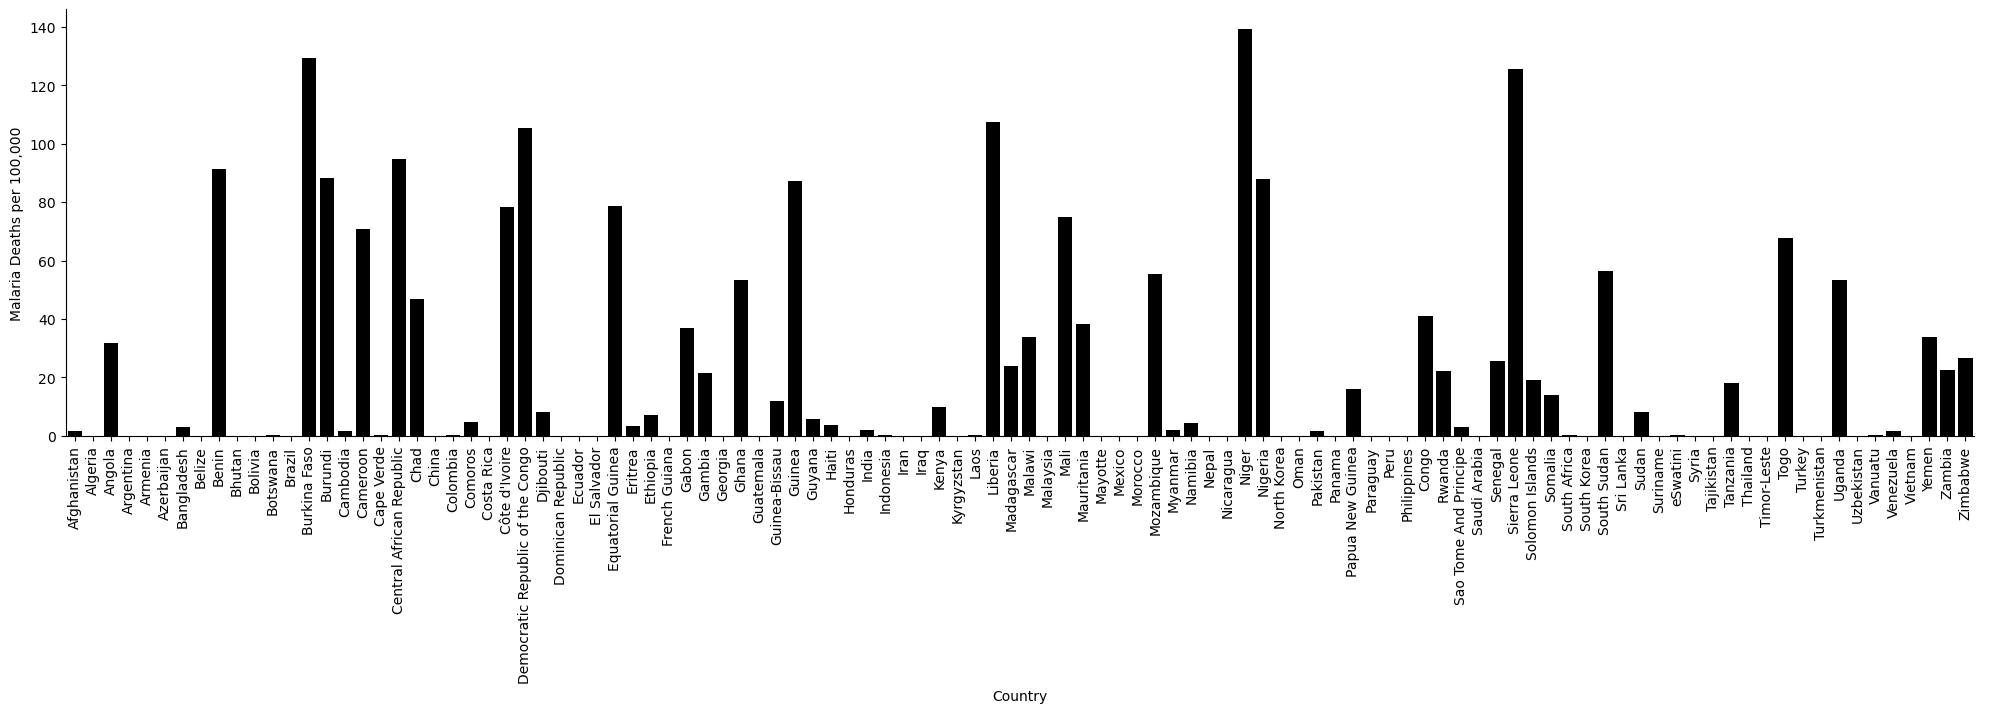

In [19]:
sns.catplot(data=malaria_df_2017, x="Name", y="Value", kind='bar', height=5, aspect=4, color='black');
plt.xticks(rotation=90);
plt.xlabel('Country')
plt.ylabel('Malaria Deaths per 100,000');

# Choropleth plots

Choropleth plots are used to display data that is divided into geographic regions, such as countries, states, or provinces. They allow for a quick comparison of the data across countries or regions and can be used to identify patterns and trends that may not be immediately obvious from looking at raw data.

In [20]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected" 
# Create a choropleth map
fig = px.choropleth(malaria_df_2017, locations='Name', locationmode='country names', color='Value', title='Deaths per 100,000 from P falciparum malaria', scope='world', color_continuous_scale='Reds')
fig.show()

/var/folders/cl/8c_jpb_n4cz6msr6x8j21ss40000gn/T/ipykernel_46341/2021458964.py:5: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



# Always explore interactions and relationships between different variables



In [21]:
datasaurus=pd.read_csv('datasaurus.csv')
display(datasaurus.head())

,variable_A,variable_B,variable_C,variable_D,variable_E,variable_F,variable_G,variable_H
0,55.3846,97.1795,58.213608,91.881892,51.203891,83.339777,52.872021,97.343223
1,51.5385,96.0256,58.196054,92.214989,58.974470,85.499818,59.014144,93.574875
2,46.1538,94.4872,58.718231,90.310532,51.872073,85.829738,56.375109,96.305148
3,42.8205,91.4103,57.278373,89.907607,48.179931,85.045117,37.839200,94.359443
4,40.7692,88.3333,58.082020,92.008145,41.683200,84.017941,39.885373,90.634662


Text(0, 0.5, 'Value (units)')

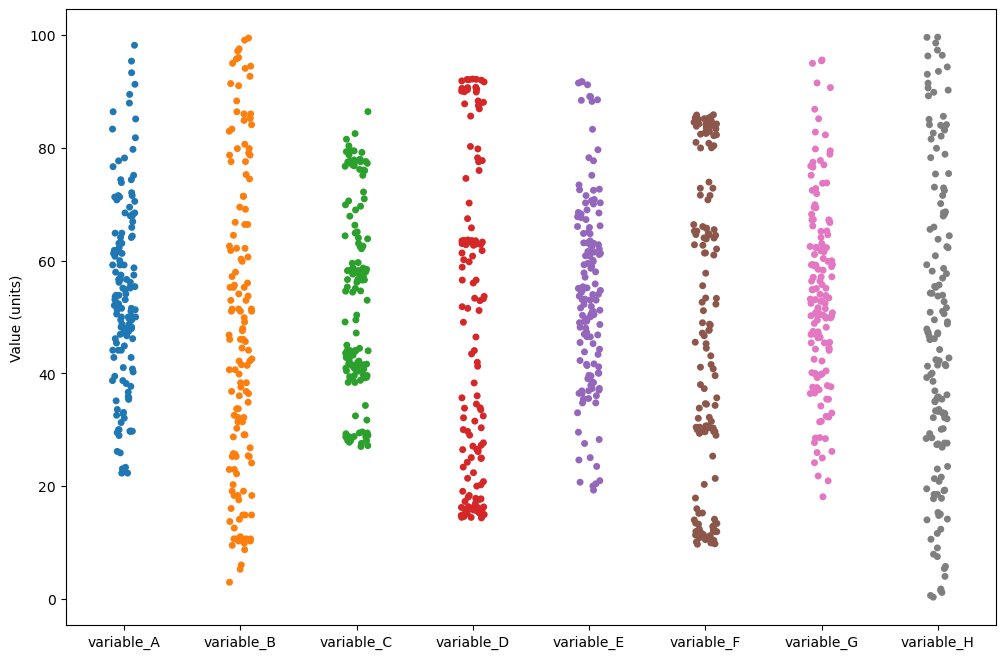

In [22]:
# Swarmplot
sns.stripplot(data=datasaurus)
plt.ylabel("Value (units)")

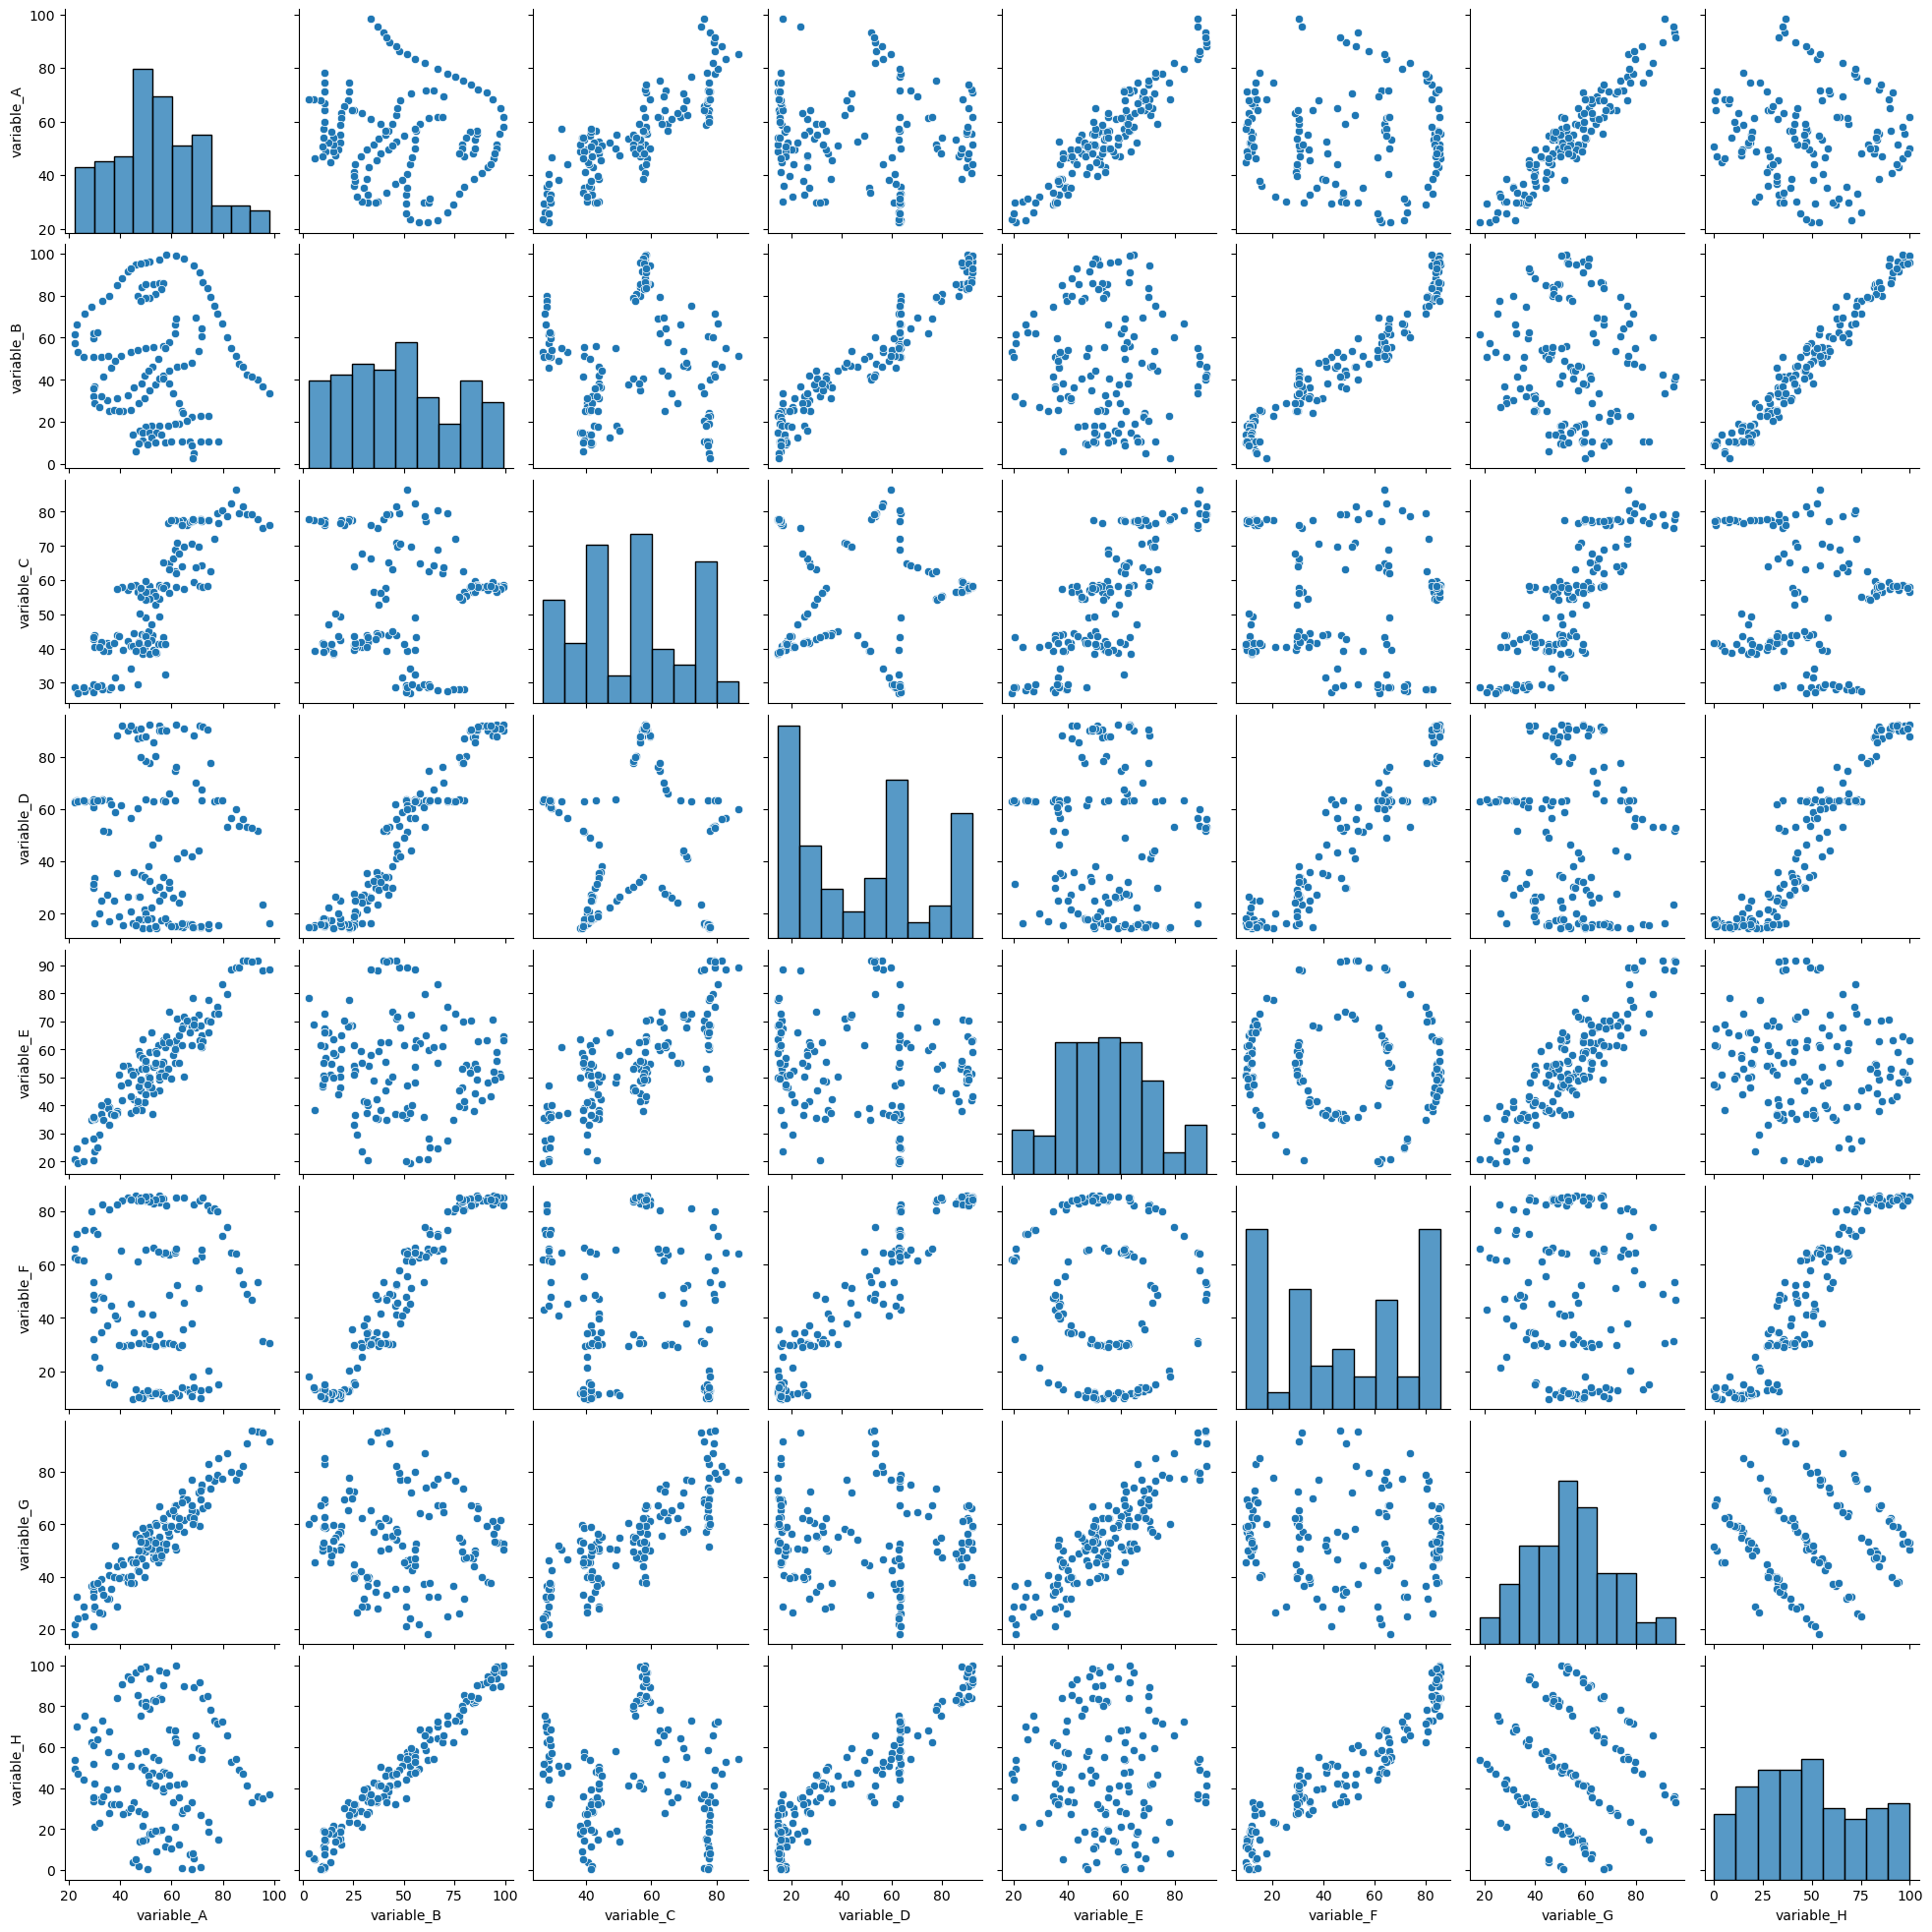

In [23]:
datasaurus=pd.read_csv('datasaurus.csv')
sns.pairplot(datasaurus)
plt.show()

## Summary

- Choose your plots to most accurately visualise the data, taking in to account number of samples and variable types
- Where possible use csv files instead of excel 


# This week's workshop

* Do self-study notebooks

* Beware of composition of the dataset.

* Write specific question you are illustrating before beginning.